# Implementation of Central Limit Theorem

Check whether the dataset agrees with the central limit theorem or not.

### Importing libraries and load data

In [11]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print(pd.__version__)
print(np.__version__)

2.1.1
1.26.1


In [12]:
# Loading data
data = pd.read_csv('datasets/churn_prediction.csv')

# Printing the data
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


### Consider population, the values of vintage feature

array([[<Axes: title={'center': 'vintage'}>]], dtype=object)

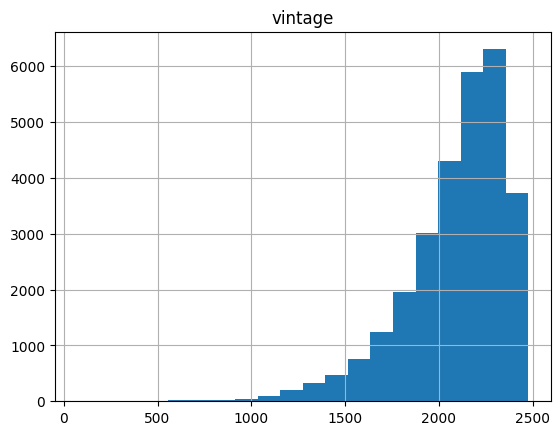

In [13]:
population = data['vintage']

# Create a dataframe
population = pd.DataFrame(population)

# Prepare a histogram
population.hist(bins = 20)

- The distribution of vintage is Left Skewed.
- The mean value of vintage feature is ~ **2091.14**.

In [14]:
# Create a list
sample_means = []

# For 1000 times,
for i in range(0, 1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sample_means.append(population.sample(n = 100).mean().values[0])

print(sample_means[:100])

[2135.4, 2090.97, 2103.5, 2033.71, 2058.47, 2118.18, 2130.34, 2122.5, 2071.93, 2099.62, 2070.59, 2109.21, 2106.94, 2113.25, 2093.78, 2109.2, 2086.58, 2047.9, 2113.17, 2065.77, 2105.99, 2141.85, 2133.37, 2043.13, 2019.29, 2101.98, 2102.37, 2114.14, 2080.09, 2125.5, 2146.26, 2119.2, 2079.06, 2104.45, 2082.94, 2058.85, 2059.22, 2127.3, 2073.98, 2078.14, 2077.6, 2102.79, 2084.35, 2140.82, 2127.07, 2071.64, 2112.76, 2133.91, 2085.07, 2113.97, 2088.77, 2053.94, 2076.58, 2045.82, 2091.99, 2131.45, 2078.99, 2115.17, 2087.55, 2061.26, 2131.43, 2071.12, 2103.69, 2115.6, 2088.92, 2100.65, 2111.59, 2097.05, 2093.1, 2095.75, 2040.14, 2098.54, 2114.15, 2084.31, 2118.78, 2136.49, 2127.1, 2104.29, 2083.08, 2062.34, 2060.53, 2078.66, 2043.05, 2064.15, 2059.56, 2116.48, 2077.78, 2106.81, 2090.71, 2050.72, 2126.81, 2146.14, 2097.02, 2128.91, 2097.15, 2127.65, 2082.69, 2084.11, 2091.4, 2108.5]


<Figure size 896x672 with 0 Axes>

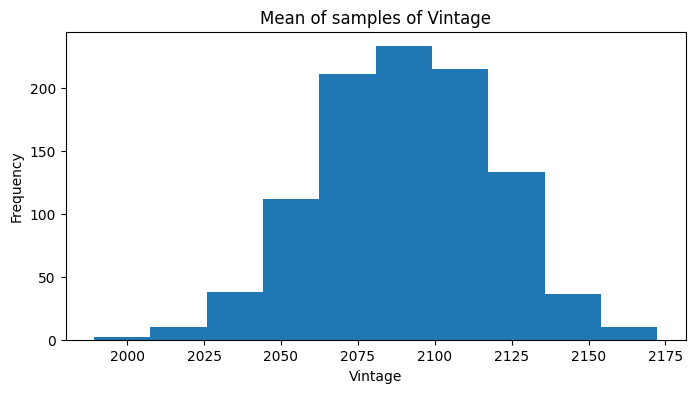

In [15]:
# plotting histogram
plt.figure(dpi = 140)
plt.figure(figsize = (8, 4))
plt.hist(sample_means)

plt.xlabel('Vintage')
plt.ylabel('Frequency')

plt.title('Mean of samples of Vintage')
plt.show()

**Inferences drawn:**
- Mean of the random samples actully follow the normal distribution.
- Central Limit Theorem can be verified by using KDE as well.

In [22]:
# Subtract sample mean from population mean
diff = population['vintage'].mean() - pd.Series(sample_means).mean()
print('The difference of the two means is {}.'.format(diff.round(2))) 

The difference of the two means is 0.36.
